# Lab: Working With Images
Understand how to deal with real world image datasets

### Runtime
20-30 Minutes

### Reference
- https://www.tensorflow.org/tutorials/images/classification
- https://www.tensorflow.org/guide/data

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras
print ('tensorflow version :', tf.__version__)
# tf.config.experimental.list_physical_devices()

tensorflow version : 2.2.0


In [2]:
## Utility functions 

%matplotlib inline
import glob
import os



## Gets number of files in the directory and total size in MB
def get_dir_stats(adir):
    listing = glob.glob(os.path.join(adir, "**/*.*"), recursive=True)
    files = [f for f in listing if os.path.isfile(f)]
    file_sizes = [os.path.getsize(f) for f in files]
    total_file_size_MB = round(sum(file_sizes) / (1024*1024), 2)
    return (len(files), total_file_size_MB)
    

def a_class_labels (dir_name, adir, a_class_labels):
    dir_stats = get_dir_stats(adir)
    print ('--- {} ({}):  files={},  size={} MB'.format(dir_name, adir, dir_stats[0], dir_stats[1]))
    for class_label in a_class_labels:
        class_dir = os.path.join(adir, class_label)
        dir_stats = get_dir_stats (class_dir)
        print ('       +-- {} :  files={},  size={} MB'.format(class_label, dir_stats[0], dir_stats[1]))


def get_class_labels(a_training_dir):
    return [d for d in os.listdir(a_training_dir) if os.path.isdir(os.path.join(a_training_dir,d))]
        
def print_dir_stats (a_dir_name, adir, a_class_labels):
    dir_stats = get_dir_stats(adir)
    print ('--- {} ({}):  files={},  size={} MB'.format(a_dir_name, adir, dir_stats[0], dir_stats[1]))
    for class_label in a_class_labels:
        class_dir = os.path.join(adir, class_label)
        dir_stats = get_dir_stats (class_dir)
        print ('       +-- {} :  files={},  size={} MB'.format(class_label, dir_stats[0], dir_stats[1]))
    
def print_training_validation_stats (a_training_dir, a_validation_dir):
    class_labels = get_class_labels(a_training_dir)
    print ('Found class lables:', class_labels)
    print ()

    print_dir_stats('training_data', a_training_dir, class_labels)
    print()
    if a_validation_dir:
        print_dir_stats('validation_data', a_validation_dir, class_labels)
        


def display_images (a_train_dir, num_images_per_label):
    import random
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

    class_labels = get_class_labels(train_dir)
    
    fig_rows = len(class_labels)
    fig_cols = num_images_per_label + 1  # adding 1 to columns, for text labels
    
    fig = plt.gcf()
    fig.set_size_inches(fig_cols * 3, fig_rows * 3)
#     fig.subplots_adjust(hspace=0.4, wspace=0.4)

    row = 0
    index = 0
    for label in class_labels:

        class_dir = os.path.join(train_dir, label)
        class_file_listing = os.listdir(class_dir)

        random_class_images = random.sample(class_file_listing, num_images_per_label )
       
        row = row + 1
        index = index + 1
        sp = plt.subplot(fig_rows, fig_cols, index)
        sp.text (0.5,0.5, label, fontsize=18, ha='center')
        sp.axis('Off') # Don't show axes (or gridlines)
   
        for img_file in random_class_images:
            index = index + 1
            sp = plt.subplot(fig_rows, fig_cols, index)
            sp.axis('Off') # Don't show axes (or gridlines)
            
            img_file_path = os.path.join(class_dir, img_file)
            img = mpimg.imread(img_file_path)
            plt.imshow(img)
            
            # this will print image file name
            # sp.text(0,0, img_file)
        
        
    plt.show()
        

## Step 1: Download Data: 'Cat-Dog-Redux'

In [3]:
import os

data_location = 'https://elephantscale-public.s3.amazonaws.com/data/images/cat-dog-redux.zip'

data_location_local = keras.utils.get_file(fname=os.path.basename(data_location),
                                           origin=data_location, extract=True)
print ('local download file: ', data_location_local)

local download file:  /home/sujee/.keras/datasets/cat-dog-redux.zip


In [4]:
## Peek inside the directory
print ("download dir: ",  os.path.dirname(data_location_local))
print ("listing of download dir: ", os.listdir(os.path.dirname(data_location_local)))

download dir:  /home/sujee/.keras/datasets
listing of download dir:  ['cat-dog', 'cats-dogs.zip', 'auto-mpg.data', 'cat-dog-redux', 'data', 'cifar-10-batches-py.tar.gz', 'flowers.zip', 'cat-dog-redux.zip', 'flowers', 'cats-dogs-redux-data.zip', 'cifar-10-batches-py', 'mnist.npz']


In [5]:
import glob

## We get the name 'cat-dog-redux' from the above directory listing
data_dir = os.path.join(os.path.dirname(data_location_local), 'cat-dog-redux')
print ('local data dir: ', data_dir)

## peek inside our data dir
print ('here is how files are organized:')
listing = glob.glob(os.path.join(data_dir, "**/*/"), recursive=True)
for d in listing:
    print (d)

local data dir:  /home/sujee/.keras/datasets/cat-dog-redux
here is how files are organized:
/home/sujee/.keras/datasets/cat-dog-redux/train/
/home/sujee/.keras/datasets/cat-dog-redux/val/
/home/sujee/.keras/datasets/cat-dog-redux/train/dog/
/home/sujee/.keras/datasets/cat-dog-redux/train/cat/
/home/sujee/.keras/datasets/cat-dog-redux/val/dog/
/home/sujee/.keras/datasets/cat-dog-redux/val/cat/


In [6]:
## We get the 'train' 'val' directory names from above listing
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'val')
print ('train dir:', train_dir)
print ('validation dir:', validation_dir)

train dir: /home/sujee/.keras/datasets/cat-dog-redux/train
validation dir: /home/sujee/.keras/datasets/cat-dog-redux/val


In [7]:
## print out stats about our dataset
print_training_validation_stats (train_dir, validation_dir)

Found class lables: ['dog', 'cat']

--- training_data (/home/sujee/.keras/datasets/cat-dog-redux/train):  files=500,  size=10.95 MB
       +-- dog :  files=250,  size=6.04 MB
       +-- cat :  files=250,  size=4.92 MB

--- validation_data (/home/sujee/.keras/datasets/cat-dog-redux/val):  files=500,  size=10.92 MB
       +-- dog :  files=250,  size=5.74 MB
       +-- cat :  files=250,  size=5.17 MB


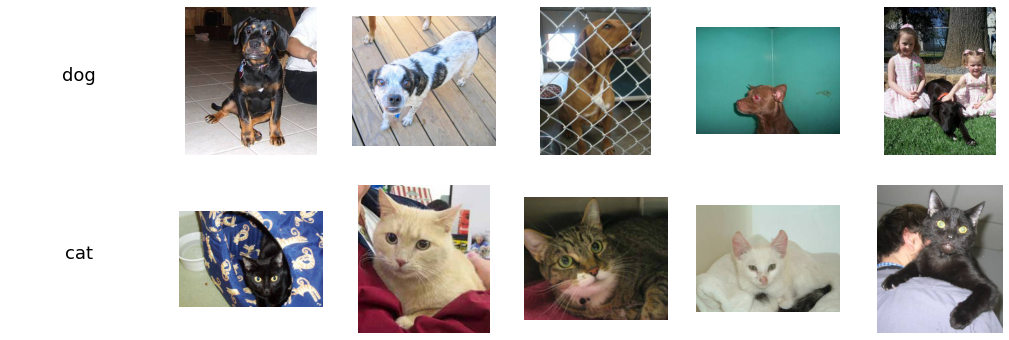

In [8]:
display_images(train_dir, 5)

## Step 2: Download Data: 'Flowers'

In [9]:
import os

data_location = 'https://elephantscale-public.s3.amazonaws.com/data/images/flowers.zip'

data_location_local = keras.utils.get_file(fname=os.path.basename(data_location),
                                           origin=data_location, extract=True)
print ('local download file: ', data_location_local)

local download file:  /home/sujee/.keras/datasets/flowers.zip


In [10]:
## Peek inside the directory
print ("download dir: ",  os.path.dirname(data_location_local))
print ("listing of download dir: ", os.listdir(os.path.dirname(data_location_local)))

download dir:  /home/sujee/.keras/datasets
listing of download dir:  ['cat-dog', 'cats-dogs.zip', 'auto-mpg.data', 'cat-dog-redux', 'data', 'cifar-10-batches-py.tar.gz', 'flowers.zip', 'cat-dog-redux.zip', 'flowers', 'cats-dogs-redux-data.zip', 'cifar-10-batches-py', 'mnist.npz']


In [11]:
import glob

## We get the name 'flowers' from the above directory listing
data_dir = os.path.join(os.path.dirname(data_location_local), 'flowers')
print ('local data dir: ', data_dir)

## peek inside our data dir
print ('here is how files are organized:')
listing = glob.glob(os.path.join(data_dir, "**/*/"), recursive=True)
for d in listing:
    print (d)

local data dir:  /home/sujee/.keras/datasets/flowers
here is how files are organized:
/home/sujee/.keras/datasets/flowers/validation/
/home/sujee/.keras/datasets/flowers/training/
/home/sujee/.keras/datasets/flowers/validation/daisy/
/home/sujee/.keras/datasets/flowers/validation/sunflowers/
/home/sujee/.keras/datasets/flowers/validation/roses/
/home/sujee/.keras/datasets/flowers/validation/tulips/
/home/sujee/.keras/datasets/flowers/validation/dandelion/
/home/sujee/.keras/datasets/flowers/training/daisy/
/home/sujee/.keras/datasets/flowers/training/sunflowers/
/home/sujee/.keras/datasets/flowers/training/roses/
/home/sujee/.keras/datasets/flowers/training/tulips/
/home/sujee/.keras/datasets/flowers/training/dandelion/


In [12]:
## We get the 'train' 'val' directory names from above listing
train_dir = os.path.join(data_dir, 'training')
validation_dir = os.path.join(data_dir, 'validation')
print ('train dir:', train_dir)
print ('validation dir:', validation_dir)

train dir: /home/sujee/.keras/datasets/flowers/training
validation dir: /home/sujee/.keras/datasets/flowers/validation


In [13]:
print_training_validation_stats (train_dir, validation_dir)

Found class lables: ['daisy', 'sunflowers', 'roses', 'tulips', 'dandelion']

--- training_data (/home/sujee/.keras/datasets/flowers/training):  files=3089,  size=194.66 MB
       +-- daisy :  files=533,  size=28.69 MB
       +-- sunflowers :  files=588,  size=46.26 MB
       +-- roses :  files=513,  size=31.78 MB
       +-- tulips :  files=677,  size=47.09 MB
       +-- dandelion :  files=776,  size=40.84 MB

--- validation_data (/home/sujee/.keras/datasets/flowers/validation):  files=583,  size=27.02 MB
       +-- daisy :  files=100,  size=4.04 MB
       +-- sunflowers :  files=111,  size=6.14 MB
       +-- roses :  files=128,  size=6.12 MB
       +-- tulips :  files=122,  size=5.47 MB
       +-- dandelion :  files=122,  size=5.25 MB


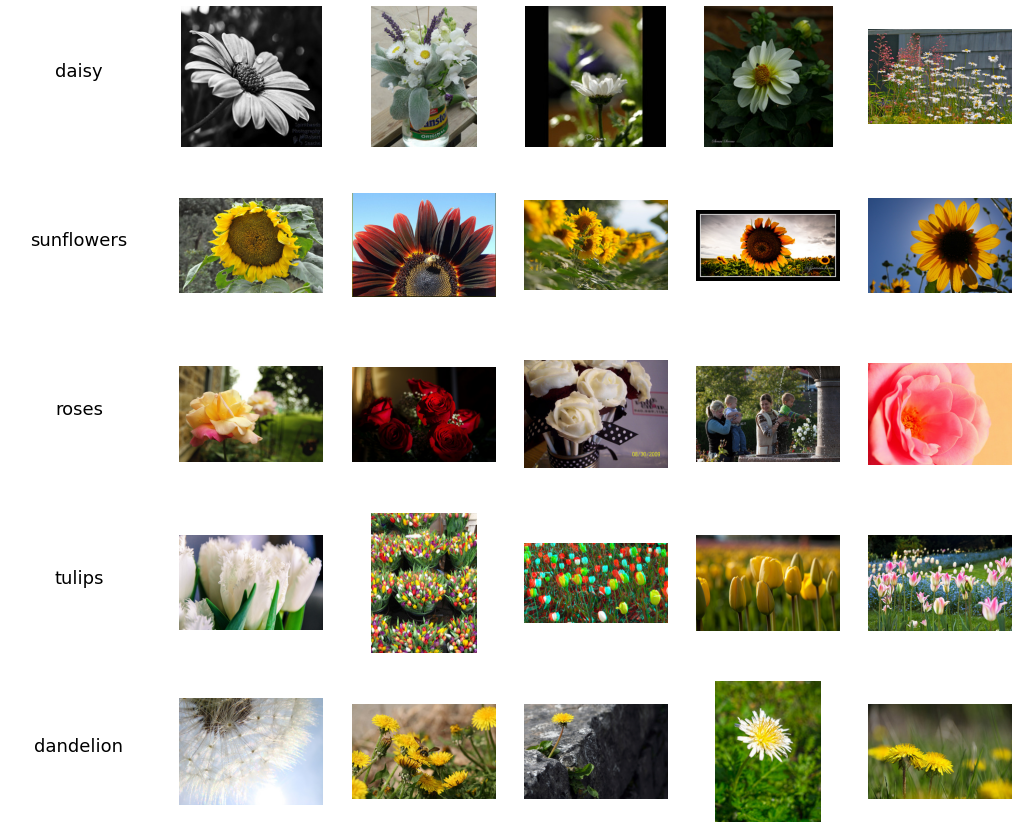

In [14]:
display_images(train_dir, 5)

## Step 3: Your Turn - Create a image bundle
- Download this sample image bundle [cars-trucks-busses.zip](https://elephantscale-public.s3.amazonaws.com/data/images/cars-trucks-busses.zip)
- We have mixed images of busses, cars and trucks
- Sort them and organize them into directory format that tensorflow will understand

Once you sorted them into classes and then into training & validation, try the following code to see if the structure looks right.

In [15]:
## TODO : point my_data_dir to where ever the dataset is
my_data_dir = 'cars-trucks-busses'
my_training_dir = os.path.join(my_data_dir, 'training')
my_validation_dir = os.path.join(my_data_dir, 'validation')

print_training_validation_stats (my_training_dir, my_validation_dir)

FileNotFoundError: [Errno 2] No such file or directory: 'cars-trucks-busses/training'